In [1]:
from transformers import DetrFeatureExtractor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
import cv2
from utils import object_detection, sift_score, plot_object
import warnings

warnings.filterwarnings('ignore')

/Users/linainsaf/miniconda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


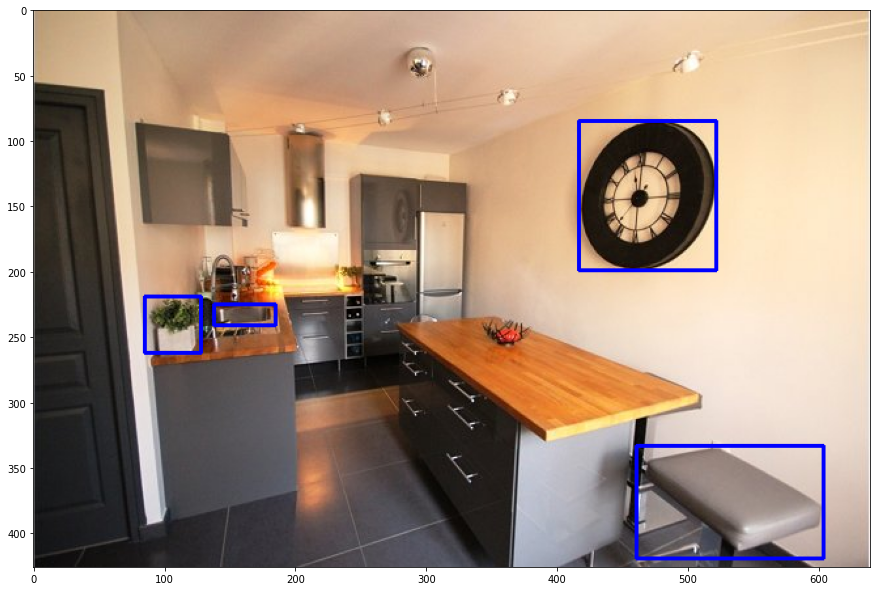

In [2]:
# Object detection in images
plot_object("data/pictures/44432__3.jpg")

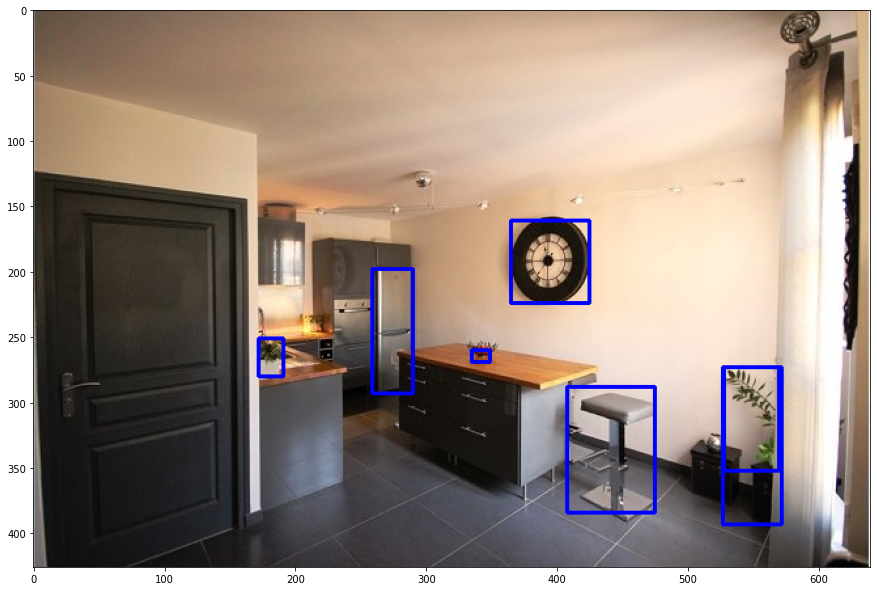

In [19]:
plot_object("data/pictures/41529__7.jpg")

In [10]:
def match_images(image_dir1, image_dir2):
    objects1, labels1, scores1, boxs1 = object_detection(image_dir1)
    objects2, labels2, scores2, boxs2 = object_detection(image_dir2)
    scores = 0
    if objects1 and objects2:
        for i in range(len(labels1)):
            for j in range(len(labels2)):
                if labels1[i] == labels2[j] :
                    score, _, _, _, _ = sift_score(objects1[i],objects2[j])
                    scores += score
        return scores/len(objects1)
    else : 
        return 0

Score :  100.0


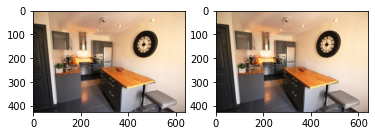

In [11]:
score = match_images("data/pictures/44432__3.jpg", "data/pictures/44432__3.jpg")
print("Score : ", score)

image1 = cv2.imread("data/pictures/44432__3.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread("data/pictures/44432__3.jpg")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image1)
axarr[1].imshow(image2)

Score :  14.735930735930737


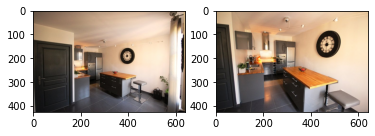

In [12]:
score = match_images("data/pictures/41529__7.jpg", "data/pictures/44432__3.jpg")
print("Score : ", score)

image1 = cv2.imread("data/pictures/41529__7.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread("data/pictures/44432__3.jpg")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image1)
axarr[1].imshow(image2)

In [13]:
data = pd.read_csv("data/pairs.csv")[:10]

In [14]:
df_listing = pd.read_csv("data/listing.csv")

In [15]:
data

,Unnamed: 0,listing_id_1,listing_id_2,labels
0,0,120777696,116630376,1
1,1,120793420,121050028,1
2,2,118823311,111300261,1
3,3,112597318,102266138,0
4,4,72795989,68729895,1
5,5,116948417,118789539,1
6,6,119253235,35030927,0
7,7,71958413,64731203,0
8,8,115234728,116548598,1
9,9,122684207,118198070,0


In [16]:
scores = []
for i in range(10):
    print(i)
    images1 = ast.literal_eval(df_listing[df_listing["listing_id"]==data["listing_id_1"].values[i]]["pictures"].values[0])
    images2 = ast.literal_eval(df_listing[df_listing["listing_id"]==data["listing_id_2"].values[i]]["pictures"].values[0])
    tot_score = 0
    for i in images1:
        for j in images2:
            score = match_images(i, j)
            tot_score += score
    scores.append(tot_score/(len(images1)*len(images2)))

0
1
2
3
4
5
6
7
8
9


In [17]:
data["scores"] = scores
data.head(10)

,Unnamed: 0,listing_id_1,listing_id_2,labels,scores
0,0,120777696,116630376,1,22.862210
1,1,120793420,121050028,1,15.656889
2,2,118823311,111300261,1,0.000000
3,3,112597318,102266138,0,10.083483
4,4,72795989,68729895,1,30.807264
5,5,116948417,118789539,1,16.347513
6,6,119253235,35030927,0,21.700260
7,7,71958413,64731203,0,2.282607
8,8,115234728,116548598,1,16.877053
9,9,122684207,118198070,0,0.173611


In [18]:
data.to_csv("data/object_det_results.csv")